# Trip will be between 2018-01-01 and 2018-01-14

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib import figure

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Have a look on the columns available in station
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#Have a look on the fisrt 5 rows in station
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [12]:
#Have a look on the columns available in measurement
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#Have a look on the fisrt 5 rows in measurement
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Exploratory Climate Analysis

## Query #1: 
Design a query to retrieve the last 12 months of precipitation data and plot the results



### Steps:

1.  Calculate the date 1 year ago from the last data point in the database

2.  Perform a query to retrieve the data and precipitation scores

3. Save the query results as a Pandas DataFrame and set the index to the date column

4.  Sort the dataframe by date

5.  Use Pandas Plotting with Matplotlib to plot the data

In [14]:
#the latest date
last_datapoint_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_datapoint_date

('2017-08-23')

In [15]:
# Convert the tuple for the latest date to datetime
pd.to_datetime(last_datapoint_date[0])

Timestamp('2017-08-23 00:00:00')

In [16]:
# 1. Calculate the date 1 year ago from the last data point in the database
A_year_before_last_datapoint_date = pd.to_datetime(last_datapoint_date[0]) - dt.timedelta(days = 365)
A_year_before_last_datapoint_date

Timestamp('2016-08-23 00:00:00')

In [17]:
# Convert the timestamp of 1 year ago from the last data point to date
A_year_before_last_datapoint_date.strftime("%Y-%m-%d")


'2016-08-23'

In [18]:
# 2. Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= A_year_before_last_datapoint_date.strftime("%Y-%m-%d")).all()
precipitation_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
# 3. Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])
precipitation_df.set_index('date',inplace=True)
precipitation_df

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [20]:
# 4.  Sort the dataframe by date
precipitation_df.sort_index(inplace=True)
precipitation_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<Figure size 864x720 with 0 Axes>

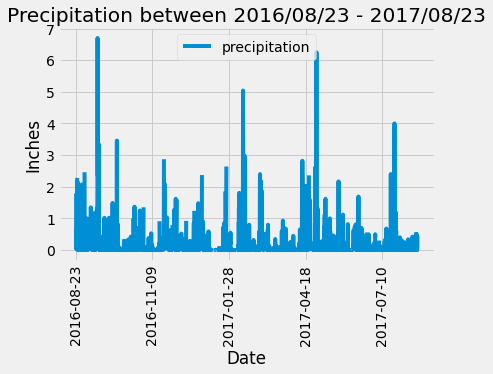

In [21]:
# 5.  Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (12,10))
precipitation_df.plot()
plt.title("Precipitation between 2016/08/23 - 2017/08/23")
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation = 'vertical')
plt.legend(loc='best')
plt.savefig("image/precipitation.png")
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Query #2:
Design a query to show how many stations are available in this dataset?

In [23]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count

9

## Query #3:
What are the most active stations? (i.e. what stations have the most rows)?
List the stations and the counts in descending order

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order
most_active_station = session.query(Station.station, func.count(Measurement.station)).filter(Station.station == Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station

('USC00519281', 2772)

## Query #4:
Using the station id from the previous query, calculate the lowest temperature recorded, 
highest temperature recorded, and average temperature of the most active station?

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station[0]
temp_query = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).filter(Measurement.station == most_active_station[0]).all()
temp_query

[(54.0, 71.66378066378067, 85.0)]

## Query #5:
Choose the station with the highest number of temperature observations.
Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [26]:
temp_obsrv_most_active_station = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station == most_active_station[0]).filter(Measurement.date >= A_year_before_last_datapoint_date.strftime("%Y-%m-%d")).order_by(Measurement.date).all()
temp_obsrv_most_active_station

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [27]:
df = pd.DataFrame(temp_obsrv_most_active_station, columns=['date','Temperature'])
df = df.set_index('date')
df

,Temperature
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


<Figure size 864x720 with 0 Axes>

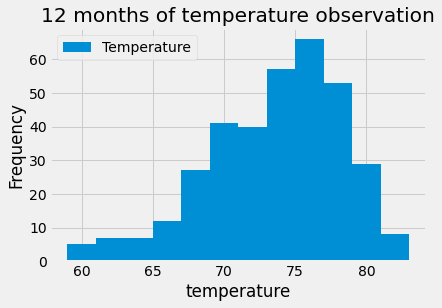

In [28]:
#plot the results as a histogram
plt.figure(figsize = (12,10))
df.plot.hist(bins =12)
plt.title("12 months of temperature observation")
plt.xlabel('temperature')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.savefig("image/station-histogram.png")
plt.show()

## Bonus Challenge Assignment

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps(A_year_before_last_datapoint_date.strftime("%Y-%m-%d"), last_datapoint_date[0]))

[(58.0, 74.59058295964125, 87.0)]


In [31]:
#calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01")
#for a trip between 2018-01-01 and 2018-01-14
start_date = "2017-01-01"
end_date = "2017-01-14"
temp_trip = calc_temps(start_date, end_date)
print(temp_trip)

[(60.0, 68.47619047619048, 81.0)]


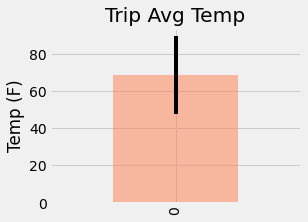

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp_df = pd.DataFrame(temp_trip,columns = ['Temp Min','Temp Avg','Temp Max'])

plt.figure(figsize = (4,3))
temp_df['Temp Avg'].plot(kind = 'bar',yerr = temp_df['Temp Max'] - temp_df['Temp Min'],color='coral',alpha=0.5)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.savefig("image/temperature.png")
plt.show()

In [38]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = ([Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)])
total_prcp = session.query(*sel).filter(Station.station == Measurement.station).filter(Measurement.date >= start_date).\
filter(Measurement.date <= end_date).group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()

total_prcp

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.63),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.63),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.61),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.35),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.21000000000000002),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [39]:
total_rainfall_df = pd.DataFrame(total_prcp, columns = ["station", "name", "latitude", "longitude", "elevation", "total Precipitation"])
total_rainfall_df

,station,name,latitude,longitude,elevation,total Precipitation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.63
1,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.63
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.61
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.35
4,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,0.21
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.00
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [40]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start_date = "2018-01-01"
trip_end_date = "2018-01-14"

# Use the start and end date to create a range of dates
trip_date_range = pd.date_range(trip_start_date ,trip_end_date)
trip_date_range

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-13', '2018-01-14'],
              dtype='datetime64[ns]', freq='D')

In [41]:
# Stip off the year and save a list of %m-%d strings
date_without_year =  trip_date_range.strftime('%m-%d')
date_without_year

Index(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08',
       '01-09', '01-10', '01-11', '01-12', '01-13', '01-14'],
      dtype='object')

In [56]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for day in date_without_year:
    normals.append(daily_normals(day))
normals

[[(62.0, 69.15384615384616, 77.0)],
 [(60.0, 69.39622641509433, 77.0)],
 [(62.0, 68.9090909090909, 77.0)],
 [(58.0, 70.0, 76.0)],
 [(56.0, 67.96428571428571, 76.0)],
 [(61.0, 68.96491228070175, 76.0)],
 [(57.0, 68.54385964912281, 76.0)],
 [(57.0, 67.16071428571429, 75.0)],
 [(58.0, 67.9298245614035, 78.0)],
 [(62.0, 69.74137931034483, 77.0)],
 [(57.0, 67.3103448275862, 78.0)],
 [(57.0, 67.4074074074074, 81.0)],
 [(57.0, 67.25454545454545, 77.0)],
 [(58.0, 69.52631578947368, 77.0)]]

In [98]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals,columns =['normal'])
df

,normal
0,"(62.0, 69.15384615384616, 77.0)"
1,"(60.0, 69.39622641509433, 77.0)"
2,"(62.0, 68.9090909090909, 77.0)"
3,"(58.0, 70.0, 76.0)"
4,"(56.0, 67.96428571428571, 76.0)"
5,"(61.0, 68.96491228070175, 76.0)"
6,"(57.0, 68.54385964912281, 76.0)"
7,"(57.0, 67.16071428571429, 75.0)"
8,"(58.0, 67.9298245614035, 78.0)"
9,"(62.0, 69.74137931034483, 77.0)"


In [99]:
df['tmin'] = ""
df['tavg'] = ""
df['tmax'] = ""
df

,normal,tmin,tavg,tmax
0,"(62.0, 69.15384615384616, 77.0)",,,
1,"(60.0, 69.39622641509433, 77.0)",,,
2,"(62.0, 68.9090909090909, 77.0)",,,
3,"(58.0, 70.0, 76.0)",,,
4,"(56.0, 67.96428571428571, 76.0)",,,
5,"(61.0, 68.96491228070175, 76.0)",,,
6,"(57.0, 68.54385964912281, 76.0)",,,
7,"(57.0, 67.16071428571429, 75.0)",,,
8,"(58.0, 67.9298245614035, 78.0)",,,
9,"(62.0, 69.74137931034483, 77.0)",,,


In [100]:
for index, row in df.iterrows():
    (tmin,tavg,tmax)= df.iloc[index,0]
    df.iloc[index,1] = tmin
    df.iloc[index,2] = tavg
    df.iloc[index,3] = tmax
df

,normal,tmin,tavg,tmax
0,"(62.0, 69.15384615384616, 77.0)",62,69.1538,77
1,"(60.0, 69.39622641509433, 77.0)",60,69.3962,77
2,"(62.0, 68.9090909090909, 77.0)",62,68.9091,77
3,"(58.0, 70.0, 76.0)",58,70,76
4,"(56.0, 67.96428571428571, 76.0)",56,67.9643,76
5,"(61.0, 68.96491228070175, 76.0)",61,68.9649,76
6,"(57.0, 68.54385964912281, 76.0)",57,68.5439,76
7,"(57.0, 67.16071428571429, 75.0)",57,67.1607,75
8,"(58.0, 67.9298245614035, 78.0)",58,67.9298,78
9,"(62.0, 69.74137931034483, 77.0)",62,69.7414,77


In [102]:
normals_df = df[['tmin','tavg','tmax']]
normals_df= normals_df.set_index(trip_date_range)
normals_df

,tmin,tavg,tmax
2018-01-01,62,69.1538,77
2018-01-02,60,69.3962,77
2018-01-03,62,68.9091,77
2018-01-04,58,70,76
2018-01-05,56,67.9643,76
2018-01-06,61,68.9649,76
2018-01-07,57,68.5439,76
2018-01-08,57,67.1607,75
2018-01-09,58,67.9298,78
2018-01-10,62,69.7414,77


<Figure size 864x864 with 0 Axes>

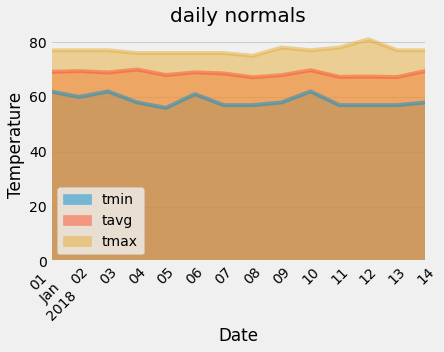

In [106]:
# Plot the daily normals as an area plot with `stacked=False`
plt.figure(figsize = (12,12))
normals_df.plot(kind='area',stacked=False, rot =45)
plt.title("daily normals")
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc='best')
plt.show()